## **Business Use Case of the Coffee Shop Revenue Dataset**  

This dataset is about predicting **daily revenue** for a coffee shop based on operational and marketing factors. Here’s how businesses could use it:  

---

### **1] Revenue Forecasting & Business Planning**  
- **Use Case:** Predict daily revenue based on past trends.  
- **Benefit:** Helps coffee shop owners plan expenses, stock, and staffing more efficiently.  

 **Example:**  
If the model predicts a revenue drop on certain weekdays, the owner can **adjust marketing campaigns** or **introduce promotions** to boost sales.  

---

### **2️] Optimizing Marketing Spend**  
- **Use Case:** Identify how much marketing spend is needed to maximize revenue.  
- **Benefit:** Avoid wasting money on ads that don’t bring enough new customers.  

 **Example:**  
If increasing **Marketing_Spend_Per_Day** by $50 only results in $20 extra revenue, it’s **not an efficient investment**.  

---

### **3️] Workforce & Staffing Optimization**  
- **Use Case:** Predict how many employees are needed daily to maximize efficiency.  
- **Benefit:** Prevents overstaffing (wasting labor costs) or understaffing (leading to poor service).  

 **Example:**  
If the model shows that **revenue is low on Mondays**, the coffee shop can **schedule fewer employees**, reducing labor costs.  

---

### **4️] Location-Based Decision Making**  
- **Use Case:** Analyze how **Location_Foot_Traffic** affects revenue.  
- **Benefit:** Helps in selecting the best location for a new coffee shop.  

 **Example:**  
If high **foot traffic** correlates with high **revenue**, it justifies opening more stores in **high-traffic areas**.  

---

### **5️] Pricing & Customer Spending Analysis**  
- **Use Case:** Understand how **Average_Order_Value** impacts total revenue.  
- **Benefit:** Helps in pricing strategies and promotions.  

 **Example:**  
If increasing the **Average_Order_Value** by $1 leads to a **10% revenue increase**, then **bundle offers** or **upselling strategies** can be introduced.  

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('coffee_shop_revenue.csv')
data.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [4]:
data.shape

(2000, 7)

In [5]:
data.isnull().sum()

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

In [6]:
data.columns

Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Number_of_Employees',
       'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue'],
      dtype='object')

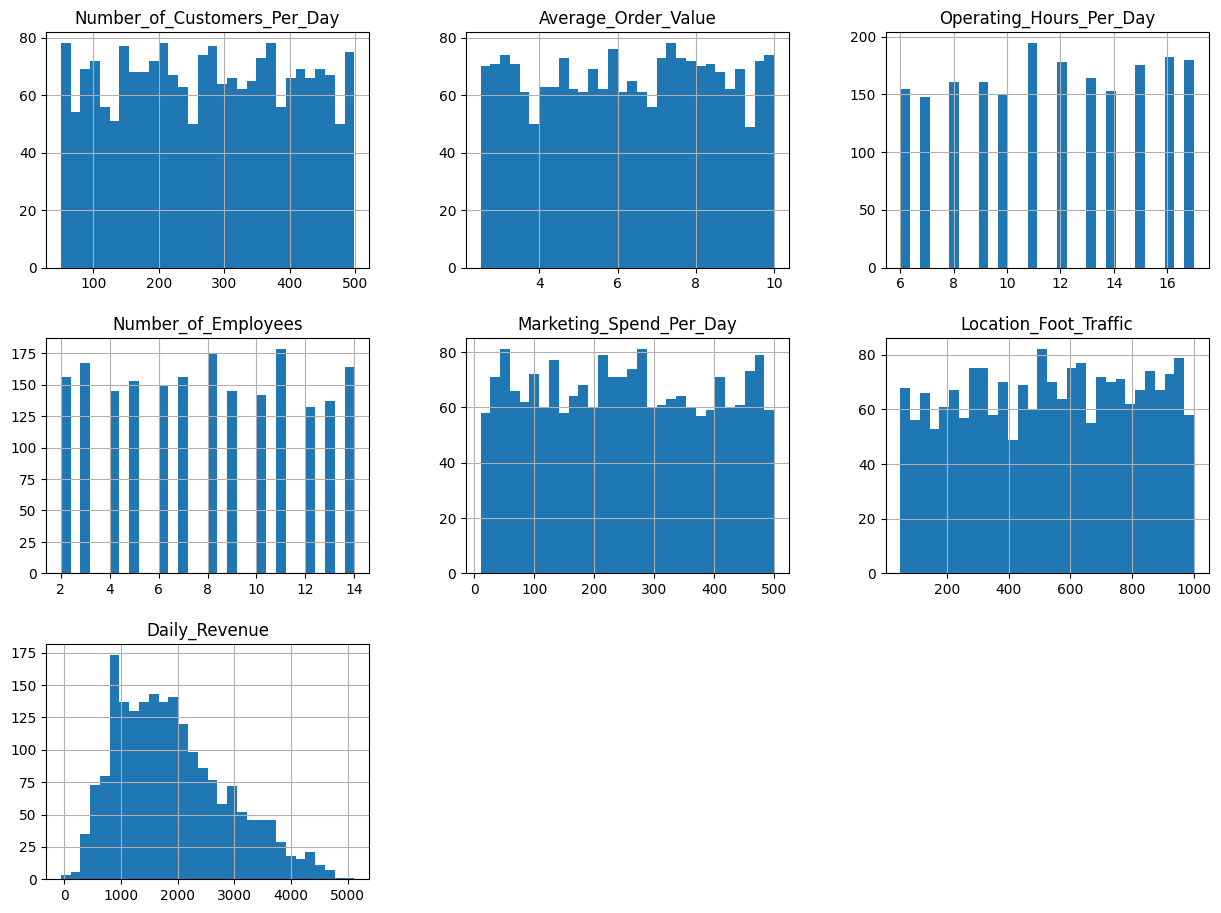

In [8]:
# Histograms for distributions
data.hist(figsize=(15, 11), bins=30)
plt.show()

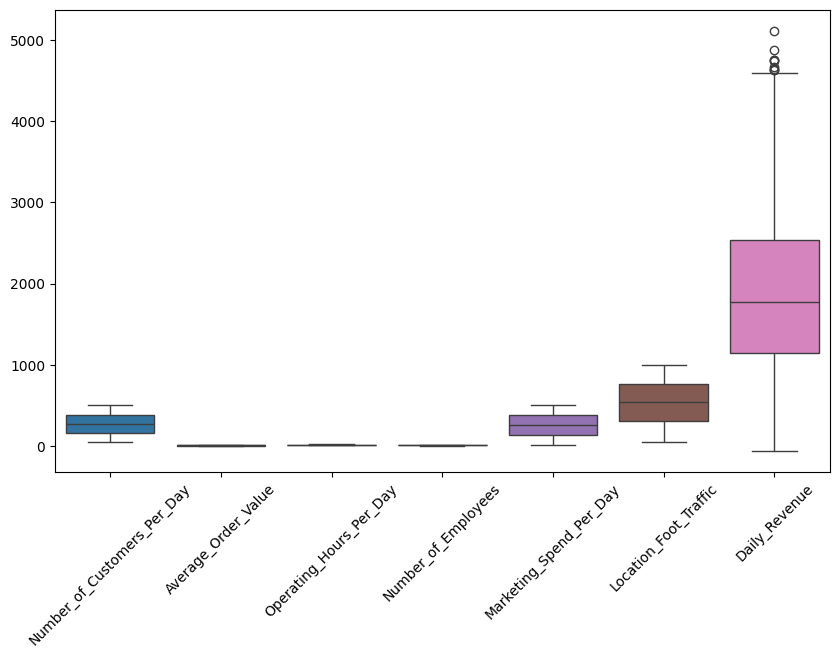

In [9]:
# Boxplots for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data)
plt.xticks(rotation=45)
plt.show()

In [10]:
data.columns

Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Number_of_Employees',
       'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue'],
      dtype='object')

In [11]:
# Checking feature relationships
data.corr()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
Number_of_Customers_Per_Day,1.000000,-0.014647,0.000122,0.000346,0.027184,-0.000880,0.736461
Average_Order_Value,-0.014647,1.000000,-0.017125,0.011484,0.018782,0.018151,0.535694
Operating_Hours_Per_Day,0.000122,-0.017125,1.000000,-0.030451,0.019247,0.014422,-0.005323
Number_of_Employees,0.000346,0.011484,-0.030451,1.000000,0.026535,-0.041881,0.003295
Marketing_Spend_Per_Day,0.027184,0.018782,0.019247,0.026535,1.000000,-0.012562,0.254812
Location_Foot_Traffic,-0.000880,0.018151,0.014422,-0.041881,-0.012562,1.000000,0.013469
Daily_Revenue,0.736461,0.535694,-0.005323,0.003295,0.254812,0.013469,1.000000


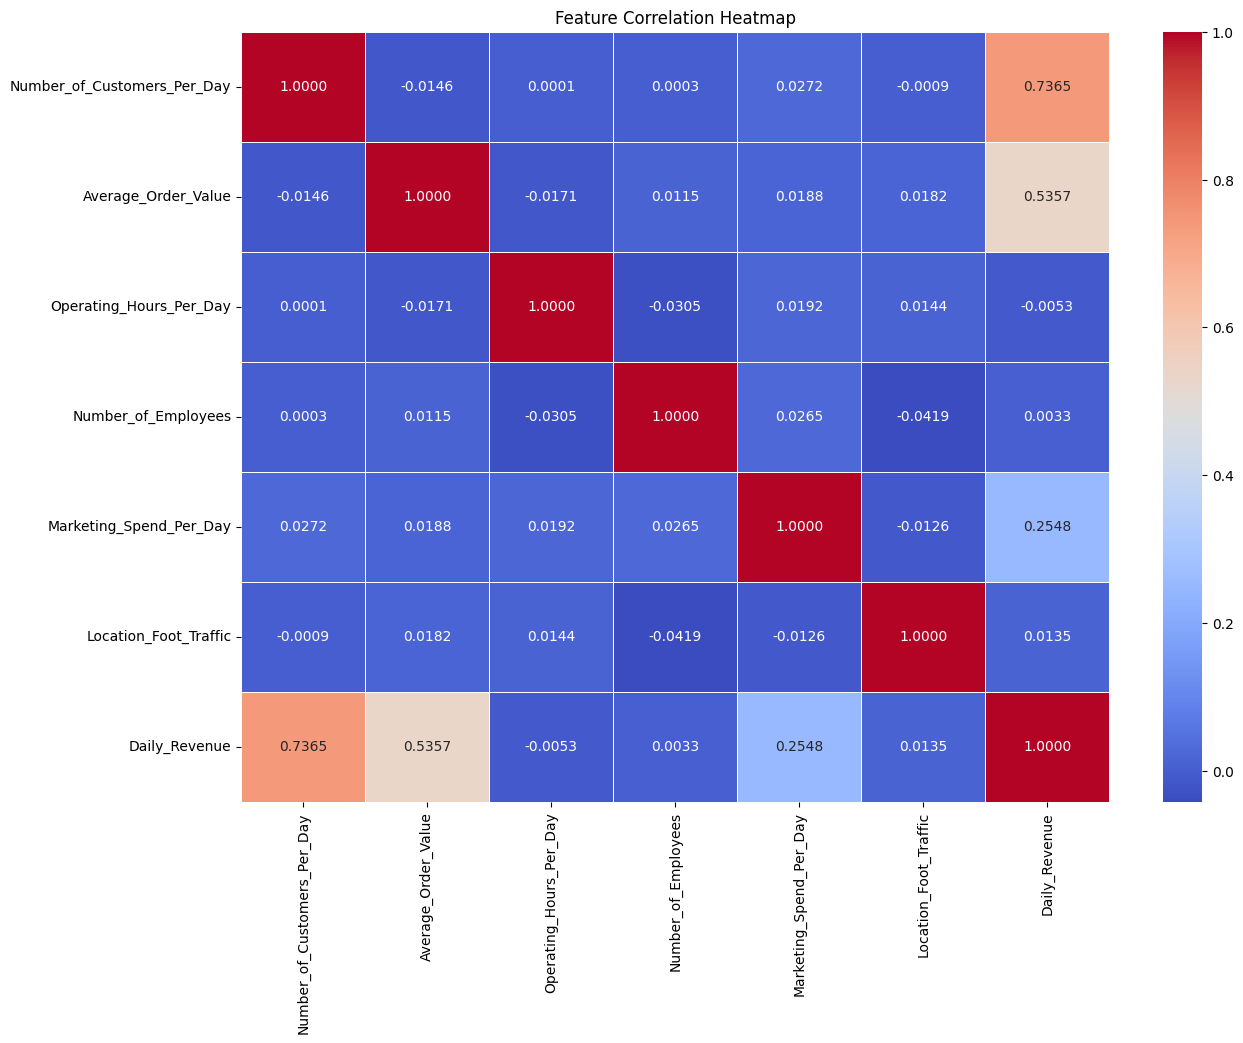

In [13]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### **Analysis of Correlation Matrix & Next Steps**
This is the **correlation matrix** of your dataset, showing how each feature correlates with `Daily_Revenue`. 

#### **Key Observations:**
1️. **Highly Correlated Features (Important for Model Performance)**
   - `Number_of_Customers_Per_Day` **(0.736)** → **Strong Positive Correlation**
   - `Average_Order_Value` **(0.535)** → **Moderate Positive Correlation**
   - `Marketing_Spend_Per_Day` **(0.254)** → **Weak Positive Correlation** (may still contribute)

2️. **Low or Near-Zero Correlation Features**
   - `Operating_Hours_Per_Day` **(-0.005)** → No meaningful impact.
   - `Number_of_Employees` **(0.0033)** → No meaningful impact.
   - `Location_Foot_Traffic` **(0.0135)** → No meaningful impact.

---

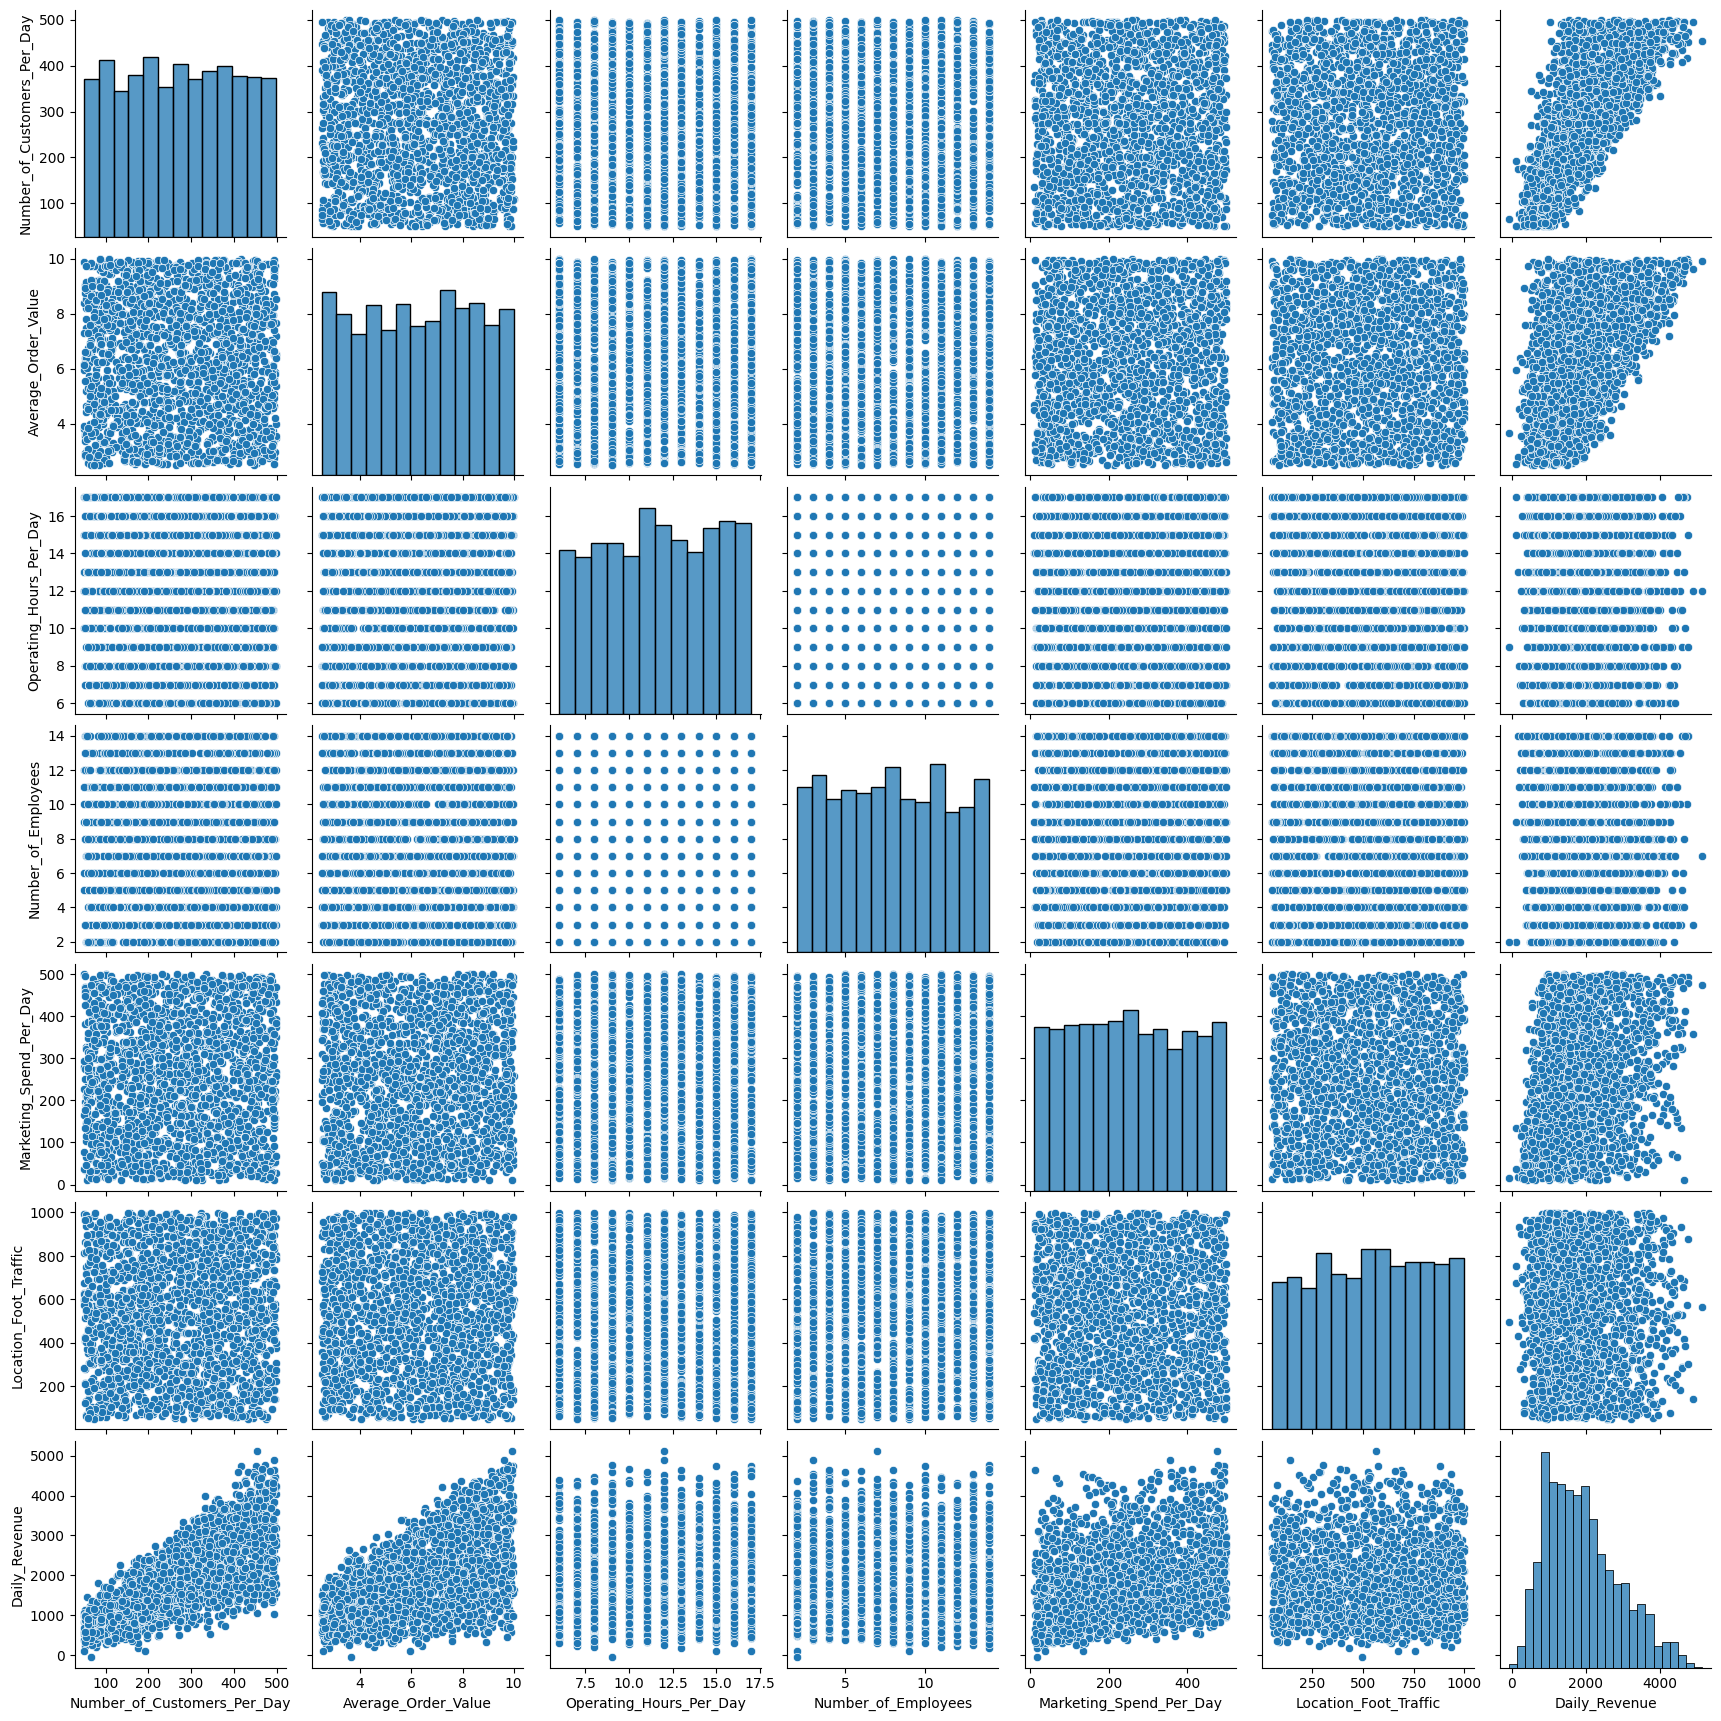

In [14]:
sns.pairplot(data)
plt.show()

In [ ]:
# for col in data.columns:
#     if col != "Daily_Revenue":
#         plt.figure(figsize=(6, 4))
#         sns.scatterplot(x=data[col], y=data["Daily_Revenue"])
#         plt.title(f"{col} vs Daily Revenue")
#         plt.show()

KeyError: 'Daily_Revenue'

<Figure size 600x400 with 0 Axes>